# LDA TOPIC MODELING 

This notebook applies LDA modeling using GENSIM toolkit and following a tutorial from machinelearningplus website:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

__Required Libraries__

In [1]:
import pandas as pd
import numpy as np


import string
import re
from pprint import pprint

# NLTK 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import zeyrek

In [2]:
STOP_WORDS = set(
"""
acaba
acep
adamakıllı
adeta
ait
ama
amma
anca
ancak
arada
artık
aslında
aynen
ayrıca
az
açıkça
açıkçası
bana
bari
bazen
bazı
bazısı
bazısına
bazısında
bazısından
bazısını
bazısının
başkası
başkasına
başkasında
başkasından
başkasını
başkasının
başka
belki
ben
bende
benden
beni
benim
beri
beriki
berikinin
berikiyi
berisi
bilcümle
bile
binaen
binaenaleyh
biraz
birazdan
birbiri
birbirine
birbirini
birbirinin
birbirinde
birbirinden
birden
birdenbire
biri
birine
birini
birinin
birinde
birinden
birice
birileri
birilerinde
birilerinden
birilerine
birilerini
birilerinin
birisi
birisine
birisini
birisinin
birisinde
birisinden
birkaç
birkaçı
birkaçına
birkaçını
birkaçının
birkaçında
birkaçından
birkez
birlikte
birçok
birçoğu
birçoğuna
birçoğunda
birçoğundan
birçoğunu
birçoğunun
birşey
birşeyi
bitevi
biteviye
bittabi
biz
bizatihi
bizce
bizcileyin
bizden
bize
bizi
bizim
bizimki
bizzat
boşuna
bu
buna
bunda
bundan
bunlar
bunları
bunların
bunu
bunun
buracıkta
burada
buradan
burası
burasına
burasını
burasının
burasında
burasından
böyle
böylece
böylecene
böylelikle
böylemesine
böylesine
büsbütün
bütün
cuk
cümlesi
cümlesine
cümlesini
cümlesinin
cümlesinden
cümlemize
cümlemizi
cümlemizden
çabuk
çabukça
çeşitli
çok
çokları
çoklarınca
çokluk
çoklukla
çokça
çoğu
çoğun
çoğunca
çoğunda
çoğundan
çoğunlukla
çoğunu
çoğunun
çünkü
da
daha
dahası
dahi
dahil
dahilen
daima
dair
dayanarak
de
defa
dek
demin
demincek
deminden
denli
derakap
derhal
derken
değil
değin
diye
diğer
diğeri
diğerine
diğerini
diğerinden
dolayı
dolayısıyla
doğru
edecek
eden
ederek
edilecek
ediliyor
edilmesi
ediyor
elbet
elbette
emme
en
enikonu
epey
epeyce
epeyi
esasen
esnasında
etmesi
etraflı
etraflıca
etti
ettiği
ettiğini
evleviyetle
evvel
evvela
evvelce
evvelden
evvelemirde
evveli
eğer
fakat
filanca
filancanın
gah
gayet
gayetle
gayri
gayrı
gelgelelim
gene
gerek
gerçi
geçende
geçenlerde
gibi
gibilerden
gibisinden
gine
göre
gırla
hakeza
halbuki
halen
halihazırda
haliyle
handiyse
hangi
hangisi
hangisine
hangisine
hangisinde
hangisinden
hani
hariç
hasebiyle
hasılı
hatta
hele
hem
henüz
hep
hepsi
hepsini
hepsinin
hepsinde
hepsinden
her
herhangi
herkes
herkesi
herkesin
herkesten
hiç
hiçbir
hiçbiri
hiçbirine
hiçbirini
hiçbirinin
hiçbirinde
hiçbirinden
hoş
hulasaten
iddia
iken
ila
ile
ilen
ilgili
ilk
illa
illaki
imdi
indinde
inen
insermi
ise
ister
itibaren
itibariyle
itibarıyla
iyi
iyice
iyicene
için
iş
işte
kadar
kaffesi
kah
kala
kanımca
karşın
kaynak
kaçı
kaçına
kaçında
kaçından
kaçını
kaçının
kelli
kendi
kendilerinde
kendilerinden
kendilerine
kendilerini
kendilerinin
kendini
kendisi
kendisinde
kendisinden
kendisine
kendisini
kendisinin
kere
kez
keza
kezalik
keşke
ki
kim
kimden
kime
kimi
kiminin
kimisi
kimisinde
kimisinden
kimisine
kimisinin
kimse
kimsecik
kimsecikler
külliyen
kısaca
kısacası
lakin
leh
lütfen
maada
madem
mademki
mamafih
mebni
međer
meğer
meğerki
meğerse
mu
mü
mı
mi
nasıl
nasılsa
nazaran
naşi
ne
neden
nedeniyle
nedenle
nedenler
nedenlerden
nedense
nerde
nerden
nerdeyse
nere
nerede
nereden
neredeyse
neresi
nereye
netekim
neye
neyi
neyse
nice
nihayet
nihayetinde
nitekim
niye
niçin
o
olan
olarak
oldu
olduklarını
oldukça
olduğu
olduğunu
olmak
olması
olsa
olsun
olup
olur
olursa
oluyor
ona
onca
onculayın
onda
ondan
onlar
onlara
onlardan
onları
onların
onu
onun
ora
oracık
oracıkta
orada
oradan
oranca
oranla
oraya
oysa
oysaki
öbür
öbürkü
öbürü
öbüründe
öbüründen
öbürüne
öbürünü
önce
önceden
önceleri
öncelikle
öteki
ötekisi
öyle
öylece
öylelikle
öylemesine
öz
pek
pekala
peki
pekçe
peyderpey
rağmen
sadece
sahi
sahiden
sana
sanki
sen
senden
seni
senin
siz
sizden
sizi
sizin
sonra
sonradan
sonraları
sonunda
şayet
şey
şeyden
şeyi
şeyler
şu
şuna
şuncacık
şunda
şundan
şunlar
şunları
şunların
şunu
şunun
şura
şuracık
şuracıkta
şurası
şöyle
şimdi
tabii
tam
tamam
tamamen
tamamıyla
tarafından
tek
tüm
üzere
var
vardı
vasıtasıyla
ve
velev
velhasıl
velhasılıkelam
veya
veyahut
ya
yahut
yakinen
yakında
yakından
yakınlarda
yalnız
yalnızca
yani
yapacak
yapmak
yaptı
yaptıkları
yaptığı
yaptığını
yapılan
yapılması
yapıyor
yeniden
yenilerde
yerine
yine
yok
yoksa
yoluyla
yüzünden
zarfında
zaten
zati
zira
""".split()
)
len(STOP_WORDS)

552

__Loading data__

In [5]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/teghub/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/teghub/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
DATA = "fctr"
if DATA.startswith("fctr"):    
    df = pd.read_csv("../data/fctr.csv", sep="\t", encoding='utf-8')
    df = df[['claim_id', 'claim', 'evidence', 'summary', 'label', 'url', 'date']]
    #df = df[['claim', 'summary', 'label']]
    
    b = ["doğru", "yanlış"]
    df= df[df['label'].isin(b)]
    df.dropna(inplace=True)
    
    stop_words = STOP_WORDS

elif DATA == "snopes":    
    df = pd.read_csv("../data/snopes.csv", sep="\t", encoding="utf-8")
    b = ["true", "false"]
    df= df[df['label'].isin(b)]
    df.dropna(inplace=True)
    
    stop_words = stopwords.words('english')

In [4]:
df.shape

(2983, 7)

In [5]:
df["content"] = df["claim"] + ". " +  df["evidence"] + ". " + df["summary"]
df.head()

claim_id                                              claim  \
0         2  Amazon'un Türkiye'de teslim edilmemiş ürünleri...   
1         5  Mickey Mouse’un penisiyle peynir deldiği film ...   
2         6  Kurtlar Vadisi'nde Milli Muharip Uçak'ın öngör...   
3         7  Basketbol topu şeklindeki binanın gerçek olduğ...   
4        13  Threads'in logosunun Homer Simpson'ın kulaklar...   

                                            evidence  \
0  Sosyal medyada sık sık yapılan paylaşımlarla A...   
1  Walt Disney'in en çok tanınan karakterlerinden...   
2  Sosyal medyada bazı kullanıcılar Kurtlar Vadis...   
3  Sosyal medyada yapılan bir paylaşımda, görüntü...   
4  5 Temmuz 2023’te Instagram, yeni bir mikroblog...   

                                             summary   label  \
0  Amazon Türkiye’de teslim edilemeyen paketlerin...  yanlış   
1  İddia görüntü dijital içerik üreten kullanıcı ...  yanlış   
2  Dizide kullanılan görsel Joint Strike Fighter ...  yanlış   
3  Görüntülerdeki bina “Madison Square Garden Sph...   doğru   
4  Homer Simpson’ın orijinal çizimlerindeki kulak...  yanlış   

                                                 url        date  \
0  https://teyit.org/analiz/amazonun-turkiyede-te...  11/07/2023   
1  https://teyit.org/analiz/mickey-mouseun-penisi...  11/07/2023   
2  https://teyit.org/analiz/kurtlar-vadisinde-mil...  11/07/2023   
3  https://teyit.org/analiz/basketbol-topu-seklin...  10/07/2023   
4  https://teyit.org/analiz/threadsin-logosunun-h...  10/07/2023   

                                             content  
0  Amazon'un Türkiye'de teslim edilmemiş ürünleri...  
1  Mickey Mouse’un penisiyle peynir deldiği film ...  
2  Kurtlar Vadisi'nde Milli Muharip Uçak'ın öngör...  
3  Basketbol topu şeklindeki binanın gerçek olduğ...  
4  Threads'in logosunun Homer Simpson'ın kulaklar...

In [6]:
data=df['content'].values.tolist()
pprint(data[:1])

["Amazon'un Türkiye'de teslim edilmemiş ürünleri uygun fiyata satışa çıkardığı "
 'iddiası. Sosyal medyada sık sık yapılan paylaşımlarla Amazon’un sahiplerine '
 'ulaşamayan paketleri hediye ettiği veya cüzi miktarlarda sattığı iddia '
 'edildi.İddialara göre Amazon, teslim edilemeyen çeşitli ürünler içeren '
 'paketlerini kullanıcılara 1,95 euro karşılığında rastgele olarak dağıtıyor. '
 'Yani paketler teknolojik ürünler içerebileceği gibi, saat gibi aksesuarları '
 'da içerebilir.\xa0Paylaşımlar bir tür dolandırıcılık örneği“Sahipsiz '
 'paketlerin satışı” konsepti 2021 yılında da TikTok başta olmak üzere çeşitli '
 'platformlarda popülarite kazanmıştı. Bu eğilime göre kullanıcılara '
 'ulaştırılamayan ürünler kapalı kutular içinde cüzi miktarlar karşılığında '
 'satışa çıkıyordu. Fakat o dönemde de bu kampanyadan faydalanan '
 'dolandırıcılar türemiş ve “gizemli kutu” sattığını iddia ederek birçok '
 'insanı dolandırmıştı.\xa0Bu yöntem ile yapılan dolandırıcılıklar ile '
 'günümüzde

__Tokenize words and Clean-up text__

In [7]:
from tqdm import tqdm
def sent_to_words(sentences, lang="en"):
    if lang == "en":
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
    elif lang == "tr":
        result = []
        for i in tqdm(range(len(sentences))):
            yield(sentences[i].split(" "))

#data_words = list(sent_to_words(data, "en"))
data_words = list(sent_to_words(data, "tr"))
print(data_words[1:2])

100%|████████████████████████████████████| 2983/2983 [00:00<00:00, 30132.12it/s]

[['Mickey', 'Mouse’un', 'penisiyle', 'peynir', 'deldiği', 'film', 'Disney’e', 'mi', 'ait?.', 'Walt', "Disney'in", 'en', 'çok', 'tanınan', 'karakterlerinden', 'olan', 'Mickey', "Mouse'a", 'ait', 'bir', 'bölümde', 'müstehcen', 'görüntüler', 'olduğu', 'iddia', 'edildi.', 'Videoda', "Mickey'nin", 'İsviçre', 'peynirine', 'penisiyle', 'delik', 'açtığı', 'görülüyor.İddia', 'videosu', 'tersine', 'görsel', 'arama', 'ile', 'araştırdığımızda', 'çok', 'sayıda', 'paylaşıma', 'rastlıyoruz.', 'Aynı', 'şekilde', 'İngilizce', '“mickey', 'mouse,', 'swiss', 'cheese”', 'anahtar', 'kelimeleri', 've', 'zaman', 'aralığı', 'kullanarak', 'aradığımızda', 'paylaşımların', '2011’e', 'kadar', 'uzandığını', 'görüyoruz.Görüntü', '2011', 'yılında', "Reddit'te", 'paylaşılmış', 'fakat', 'yayından', 'kaldırılmış.', 'Ne', 'var', 'ki', 'Reddit’teki', 'bu', 'sayfa', 'Wayback', 'Machine', 'üzerinde', 'arşive', 'kaydedilmiş.', 'Arşiv', 'sayfasındaki', 'yorumlarda', 'görüntünün\xa0b3ta.com\xa0isimli', 'sitede', 'paylaşılan', 

__Bigrams & Trigrams__

Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
#print(trigram_mod[bigram_mod[data_words[0]]])

__Remove Stopwords, Make Bigrams and Lemmatize__

In [16]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts, lang="en"):
    if lang == "en":
        return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    else: 
        return [[word for word in doc if word not in stop_words] for doc in texts]
        #return texts

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'], lang="en"):
    """https://spacy.io/api/annotation"""
    result = []
    
    if lang == "tr":
        analyzer = zeyrek.MorphAnalyzer()
        for sent in texts:
            lemmas = []
            for token in sent:
                if token not in STOP_WORDS:
                    morph = analyzer.analyze(token)
                    if len(morph) > 0 and morph[0][0].pos.upper() in allowed_postags: 
                        lemmas.append(morph[0][0].lemma.lower())
            
            result.append(lemmas)
    elif lang == "en":
        # Initialize spacy 'es' model, keeping only tagger component (for efficiency)
        #python3 -m spacy download en
        nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            result.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

    return result

__Let’s call the functions in order__

In [18]:
data_words_nostops = remove_stopwords(data_words, "tr")
data_words_nostops

[["Amazon'un",
  "Türkiye'de",
  'teslim',
  'edilmemiş',
  'ürünleri',
  'uygun',
  'fiyata',
  'satışa',
  'çıkardığı',
  'iddiası.',
  'Sosyal',
  'medyada',
  'sık',
  'sık',
  'paylaşımlarla',
  'Amazon’un',
  'sahiplerine',
  'ulaşamayan',
  'paketleri',
  'hediye',
  'cüzi',
  'miktarlarda',
  'sattığı',
  'edildi.İddialara',
  'Amazon,',
  'teslim',
  'edilemeyen',
  'ürünler',
  'içeren',
  'paketlerini',
  'kullanıcılara',
  '1,95',
  'euro',
  'karşılığında',
  'rastgele',
  'dağıtıyor.',
  'Yani',
  'paketler',
  'teknolojik',
  'ürünler',
  'içerebileceği',
  'gibi,',
  'saat',
  'aksesuarları',
  'içerebilir.\xa0Paylaşımlar',
  'bir',
  'tür',
  'dolandırıcılık',
  'örneği“Sahipsiz',
  'paketlerin',
  'satışı”',
  'konsepti',
  '2021',
  'yılında',
  'TikTok',
  'başta',
  'platformlarda',
  'popülarite',
  'kazanmıştı.',
  'Bu',
  'eğilime',
  'kullanıcılara',
  'ulaştırılamayan',
  'ürünler',
  'kapalı',
  'kutular',
  'içinde',
  'cüzi',
  'miktarlar',
  'karşılığında'

In [13]:
#To run this code it is necessary to get the spacy moidel: "!python - m spacy download en", last depends on the used language 

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
#data_words_bigrams

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'PROPN'], lang="en") 

#print(data_lemmatized[:1])

In [19]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words, "tr")
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'PROPN'], lang="tr") 
#print(data_lemmatized[:1])

__Create the Dictionary and Corpus needed for Topic Modeling__

In [20]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 7), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (6, 16), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 3), (17, 1), (18, 2), (19, 2), (20, 1), (21, 2), (22, 3), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 3), (33, 2), (34, 1), (35, 2), (36, 4), (37, 7), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 6), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 2), (59, 3), (60, 1), (61, 1), (62, 4), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 5), (70, 3), (71, 2), (72, 1), (73, 3), (74, 1), (75, 1), (76, 1), (77, 1), (78, 3), (79, 1), (80, 1), (81, 2), (82, 2), (83, 1), (84, 2), (85, 1), (86, 3), (87, 2), (88, 2), (89, 2), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 8), (96, 2), (97, 2), (98, 1), (99, 1), (100, 1), (101, 4), (102, 2), (103, 1), (104, 2), (105, 1), (106, 4), (107, 2), (108, 1), (109, 1), (110, 4

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary

In [21]:
id2word[1]

'aksesuar'

Or, you can see a human-readable form of the corpus itself.

In [22]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('abd', 7),
  ('aksesuar', 1),
  ('aktarmak', 1),
  ('aktif', 1),
  ('almak', 2),
  ('alt', 3),
  ('amazon', 16),
  ('aracı', 1),
  ('aramak', 1),
  ('arttırmak', 2),
  ('artırmak', 1),
  ('ayırt', 1),
  ('açmak', 1),
  ('açık', 3),
  ('bağ', 1),
  ('bağlantı', 1),
  ('bağımsız', 3),
  ('bağış', 1),
  ('bağışlamak', 2),
  ('başlamak', 2),
  ('belirlemek', 1),
  ('belirtmek', 2),
  ('benzer', 3),
  ('benzeri', 3),
  ('bilgi', 1),
  ('birikmek', 1),
  ('bulunmak', 1),
  ('bureau', 1),
  ('business', 1),
  ('cevap', 1),
  ('cüzi', 2),
  ('dayanmak', 1),
  ('dağıtmak', 3),
  ('defo', 2),
  ('demek', 1),
  ('depo', 2),
  ('dolandırmak', 4),
  ('dolandırıcı', 7),
  ('durum', 2),
  ('döne', 1),
  ('dükkân', 1),
  ('dış', 1),
  ('ebay', 1),
  ('ek', 2),
  ('en', 1),
  ('engellemek', 1),
  ('etap', 1),
  ('etmek', 6),
  ('etmen', 1),
  ('euro', 2),
  ('eğil', 1),
  ('facebook', 1),
  ('faydalanmak', 1),
  ('fedex', 1),
  ('firma', 1),
  ('fiyat', 3),
  ('fotoğraf', 1),
  ('gelmek', 1),
  ('ge

__Building the Topic Model__

In [35]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=4,
                                           alpha='auto',
                                           per_word_topics=True)

__View the topics in LDA model__

In [36]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"iddia" + 0.022*"haber" + 0.018*"kişi" + 0.017*"paylaşım" + '
  '0.014*"bilgi" + 0.014*"hesap" + 0.014*"paylaşmak" + 0.013*"olmak" + '
  '0.012*"çocuk" + 0.010*"kul"'),
 (1,
  '0.027*"fotoğraf" + 0.020*"görsel" + 0.019*"hesap" + 0.018*"paylaşım" + '
  '0.015*"paylaşmak" + 0.015*"iddia" + 0.011*"video" + 0.011*"isim" + '
  '0.009*"görüntü" + 0.009*"kul"'),
 (2,
  '0.012*"ülke" + 0.011*"türkiye" + 0.010*"yıl" + 0.009*"tarih" + '
  '0.007*"iddia" + 0.007*"veri" + 0.007*"almak" + 0.007*"olmak" + '
  '0.006*"devlet" + 0.006*"türki"'),
 (3,
  '0.040*"aşı" + 0.017*"olmak" + 0.013*"virüs" + 0.011*"iddia" + '
  '0.011*"çalışmak" + 0.009*"insan" + 0.009*"hastalık" + 0.008*"araştırma" + '
  '0.008*"kişi" + 0.007*"etki"'),
 (4,
  '0.014*"video" + 0.014*"iddia" + 0.013*"haber" + 0.012*"olmak" + '
  '0.009*"ifade" + 0.008*"paylaşım" + 0.008*"isim" + 0.007*"tarih" + '
  '0.007*"yemek" + 0.007*"konuşmak"'),
 (5,
  '0.012*"kul" + 0.011*"ürün" + 0.009*"üremek" + 0.009*"su" + 0.008*"elektri

__Compute Model Perplexity and Coherence Score__

In [37]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.698663299609718

Coherence Score:  0.38840183552866087


In [38]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('iddia', 0.021851657),
   ('haber', 0.021695158),
   ('kişi', 0.017670417),
   ('paylaşım', 0.017308488),
   ('bilgi', 0.014040956),
   ('hesap', 0.014021752),
   ('paylaşmak', 0.013744871),
   ('olmak', 0.012902726),
   ('çocuk', 0.0124554075),
   ('kul', 0.010377797)]),
 (1,
  [('fotoğraf', 0.02735408),
   ('görsel', 0.020416128),
   ('hesap', 0.019431476),
   ('paylaşım', 0.018025244),
   ('paylaşmak', 0.0148935625),
   ('iddia', 0.014552273),
   ('video', 0.011457446),
   ('isim', 0.010976274),
   ('görüntü', 0.009158477),
   ('kul', 0.008508847)]),
 (2,
  [('ülke', 0.011739697),
   ('türkiye', 0.010648234),
   ('yıl', 0.0099171065),
   ('tarih', 0.00901606),
   ('iddia', 0.007414701),
   ('veri', 0.0071597793),
   ('almak', 0.006950311),
   ('olmak', 0.0065988833),
   ('devlet', 0.0064244517),
   ('türki', 0.0062693465)]),
 (3,
  [('aşı', 0.039592672),
   ('olmak', 0.017445112),
   ('virüs', 0.013418436),
   ('iddia', 0.010916323),
   ('çalışmak', 0.010818174),
   ('insan

__Visualize the topics-keywords__

In [39]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.076587  0.005847       1        1  25.253836
3     -0.061381 -0.161215       2        1  21.161749
2      0.005946 -0.156218       3        1  19.715448
1      0.131747  0.173404       4        1  13.313088
0      0.134208  0.017594       5        1  12.175112
5     -0.287106  0.120587       6        1   8.380766, topic_info=         Term         Freq        Total Category  logprob  loglift
785       aşı  5554.000000  5554.000000  Default  30.0000  30.0000
56   fotoğraf  2475.000000  2475.000000  Default  29.0000  29.0000
409     hesap  3091.000000  3091.000000  Default  28.0000  28.0000
582     haber  4661.000000  4661.000000  Default  27.0000  27.0000
292    görsel  2214.000000  2214.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
26   bulunmak   276.731171  2685.032572   Topic6  -5.3020   0.2068
214     iddia   340.450640  8242.977766   Topic6  -5.0948  -0.7076
391     dünya   236.173016  1359.538612   Topic6  -5.4605   0.7289
146   türkiye   237.770423  2136.963692   Topic6  -5.4538   0.2834
203      fark   207.735191  1914.421957   Topic6  -5.5888   0.2583

[433 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4077      1  0.022915      ab
4077      5  0.970081      ab
183       1  0.332235      ad
183       2  0.168169      ad
183       3  0.010547      ad
...     ...       ...     ...
181       3  0.644531  şirket
181       4  0.041831  şirket
181       5  0.036708  şirket
181       6  0.257813  şirket
5050      5  0.982391   şoför

[852 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1, 6])

In [47]:
pyLDAvis.save_html(vis, 'fctr_topics_6.html')

__How to find the optimal number of topics for LDA?__

My approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=4,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')#c_v u_mass
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=10, step=1)

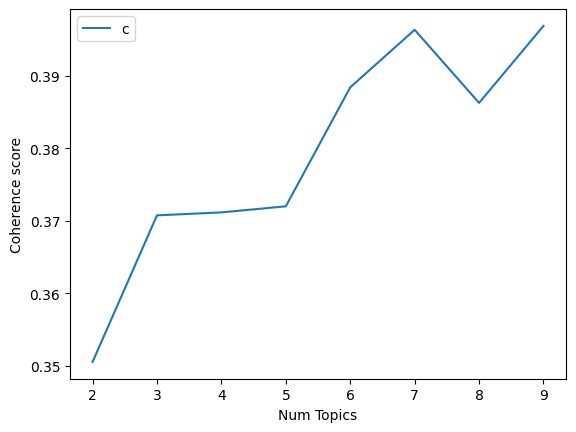

In [25]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
#plt.show()
plt.savefig("coherence_cv_fctr.png")

In [26]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3506
Num Topics = 3  has Coherence Value of 0.3708
Num Topics = 4  has Coherence Value of 0.3712
Num Topics = 5  has Coherence Value of 0.372
Num Topics = 6  has Coherence Value of 0.3884
Num Topics = 7  has Coherence Value of 0.3963
Num Topics = 8  has Coherence Value of 0.3863
Num Topics = 9  has Coherence Value of 0.3969


In [40]:
# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.022*"iddia" + 0.022*"haber" + 0.018*"kişi" + 0.017*"paylaşım" + '
  '0.014*"bilgi" + 0.014*"hesap" + 0.014*"paylaşmak" + 0.013*"olmak" + '
  '0.012*"çocuk" + 0.010*"kul"'),
 (1,
  '0.027*"fotoğraf" + 0.020*"görsel" + 0.019*"hesap" + 0.018*"paylaşım" + '
  '0.015*"paylaşmak" + 0.015*"iddia" + 0.011*"video" + 0.011*"isim" + '
  '0.009*"görüntü" + 0.009*"kul"'),
 (2,
  '0.012*"ülke" + 0.011*"türkiye" + 0.010*"yıl" + 0.009*"tarih" + '
  '0.007*"iddia" + 0.007*"veri" + 0.007*"almak" + 0.007*"olmak" + '
  '0.006*"devlet" + 0.006*"türki"'),
 (3,
  '0.040*"aşı" + 0.017*"olmak" + 0.013*"virüs" + 0.011*"iddia" + '
  '0.011*"çalışmak" + 0.009*"insan" + 0.009*"hastalık" + 0.008*"araştırma" + '
  '0.008*"kişi" + 0.007*"etki"'),
 (4,
  '0.014*"video" + 0.014*"iddia" + 0.013*"haber" + 0.012*"olmak" + '
  '0.009*"ifade" + 0.008*"paylaşım" + 0.008*"isim" + 0.007*"tarih" + '
  '0.007*"yemek" + 0.007*"konuşmak"'),
 (5,
  '0.012*"kul" + 0.011*"ürün" + 0.009*"üremek" + 0.009*"su" + 0.008*"elektri

__Finding the dominant topic in each sentence__

In [41]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    dominant_topics = [max(lda_model.get_document_topics(doc), key=lambda x: x[1]) for doc in corpus]
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(dominant_topics):
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
        
        new_data = pd.DataFrame({
            'Topic_num': [int(topic_num)],
            'Prop_topic': [round(prop_topic, 4)],
            'Topic_keywords': [topic_keywords]
        })

        sent_topics_df = pd.concat([sent_topics_df, new_data], ignore_index=True)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               0              0.4745   
1            1               1              0.4787   
2            2               4              0.4121   
3            3               1              0.6259   
4            4               4              0.7169   
5            5               0              0.2782   
6            6               2              0.3494   
7            7               0              0.6271   
8            8               0              0.3792   
9            9               3              0.4173   

                                            Keywords  \
0  iddia, haber, kişi, paylaşım, bilgi, hesap, pa...   
1  fotoğraf, görsel, hesap, paylaşım, paylaşmak, ...   
2  video, iddia, haber, olmak, ifade, paylaşım, i...   
3  fotoğraf, görsel, hesap, paylaşım, paylaşmak, ...   
4  video, iddia, haber, olmak, ifade, paylaşım, i...   
5  iddia, haber, kişi, paylaşım, bilgi, hesap, pa...   
6  ülke, türkiye, yıl, tarih, iddia, veri, almak,...   
7  iddia, haber, kişi, paylaşım, bilgi, hesap, pa...   
8  iddia, haber, kişi, paylaşım, bilgi, hesap, pa...   
9  aşı, olmak, virüs, iddia, çalışmak, insan, has...   

                                                Text  
0  Amazon'un Türkiye'de teslim edilmemiş ürünleri...  
1  Mickey Mouse’un penisiyle peynir deldiği film ...  
2  Kurtlar Vadisi'nde Milli Muharip Uçak'ın öngör...  
3  Basketbol topu şeklindeki binanın gerçek olduğ...  
4  Threads'in logosunun Homer Simpson'ın kulaklar...  
5  ABD’de uçan araba testinin onaylandığı iddiası...  
6  İnegöl'deki Göçmen Sağlık Merkezi’nin yer aldı...  
7  Threads hesabını silen kullanıcıların Instagra...  
8  Slovenya'da bir başhemşirenin üç farklı Covid-...  
9  Hollanda Hükümetinin otizmli ve hafif engellil...

In [42]:
df_dominant_topic.shape

(2983, 5)

In [43]:
df_dominant_topic["Dominant_Topic"] = df_dominant_topic["Dominant_Topic"].astype(int)
df_dominant_topic["Dominant_Topic"].value_counts()

Dominant_Topic
4    927
3    600
2    524
1    472
0    293
5    167
Name: count, dtype: int64

In [44]:
dominant_topics = df_dominant_topic["Dominant_Topic"].to_list()
df["C"] = dominant_topics

In [45]:
df.to_csv('fctr_topics.csv',sep='\t', encoding="utf-8")

In [46]:
df2 = pd.read_csv('fctr_topics.csv',sep='\t')
df2.head()

Unnamed: 0  claim_id                                              claim  \
0           0         2  Amazon'un Türkiye'de teslim edilmemiş ürünleri...   
1           1         5  Mickey Mouse’un penisiyle peynir deldiği film ...   
2           2         6  Kurtlar Vadisi'nde Milli Muharip Uçak'ın öngör...   
3           3         7  Basketbol topu şeklindeki binanın gerçek olduğ...   
4           4        13  Threads'in logosunun Homer Simpson'ın kulaklar...   

                                            evidence  \
0  Sosyal medyada sık sık yapılan paylaşımlarla A...   
1  Walt Disney'in en çok tanınan karakterlerinden...   
2  Sosyal medyada bazı kullanıcılar Kurtlar Vadis...   
3  Sosyal medyada yapılan bir paylaşımda, görüntü...   
4  5 Temmuz 2023’te Instagram, yeni bir mikroblog...   

                                             summary   label  \
0  Amazon Türkiye’de teslim edilemeyen paketlerin...  yanlış   
1  İddia görüntü dijital içerik üreten kullanıcı ...  yanlış   
2  Dizide kullanılan görsel Joint Strike Fighter ...  yanlış   
3  Görüntülerdeki bina “Madison Square Garden Sph...   doğru   
4  Homer Simpson’ın orijinal çizimlerindeki kulak...  yanlış   

                                                 url        date  \
0  https://teyit.org/analiz/amazonun-turkiyede-te...  11/07/2023   
1  https://teyit.org/analiz/mickey-mouseun-penisi...  11/07/2023   
2  https://teyit.org/analiz/kurtlar-vadisinde-mil...  11/07/2023   
3  https://teyit.org/analiz/basketbol-topu-seklin...  10/07/2023   
4  https://teyit.org/analiz/threadsin-logosunun-h...  10/07/2023   

                                             content  C  
0  Amazon'un Türkiye'de teslim edilmemiş ürünleri...  0  
1  Mickey Mouse’un penisiyle peynir deldiği film ...  1  
2  Kurtlar Vadisi'nde Milli Muharip Uçak'ın öngör...  4  
3  Basketbol topu şeklindeki binanın gerçek olduğ...  1  
4  Threads'in logosunun Homer Simpson'ın kulaklar...  4

__Find the most representative document for each topic__

In [34]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

Topic_Num  Topic_Perc_Contrib  \
0          0              0.7993   
1          1              0.6207   
2          2              0.6278   
3          3              0.7931   
4          4              0.7398   

                                            Keywords  \
0  bir, iddia, bilgi, yer, karar, ilgi, Uzer, İst...   
1  haber, bir, iddia, yer, kadın, tarihî, yıl, ta...   
2  bir, iddia, isim, hesap, taraf, kul, ad, yer, ...   
3  bir, iddia, olmak, ası, insan, ancak, etki, ci...   
4  Turki, yıl, bir, yer, Aras, iddia, yemek, yapı...   

                                                Text  
0  Türkiye’de 29 Nisan - 17 Mayıs arasındaki kısı...  
1  Bir Instagram hesabı tarafından 21 Ekim 2021 t...  
2  Ekşi Sözlük’te açılan bir başlıkta yer alan id...  
3  Sosyal medyada paylaşılan iddiaya göre bedenim...  
4  Turizmci fiyat farklılığını nasıl açıklıyor? T...

__Topic distribution across documents__

In [35]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head()

Dominant_Topic                                     Topic_Keywords  \
0               5  video, bir, iddia, yer, taraf, deprem, kul, Uz...   
1               5  video, bir, iddia, yer, taraf, deprem, kul, Uz...   
2               0  bir, iddia, bilgi, yer, karar, ilgi, Uzer, İst...   
3               5  video, bir, iddia, yer, taraf, deprem, kul, Uz...   
4               2  bir, iddia, isim, hesap, taraf, kul, ad, yer, ...   

   Num_Documents  Perc_Documents  
0          801.0          0.1180  
1         1027.0          0.1513  
2         1210.0          0.1783  
3          937.0          0.1381  
4          630.0          0.0928